In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import math
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from keras.utils import to_categorical
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data
from torch.utils.data.dataset import Dataset
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [0]:
#подключение к файлам google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#data_root_path = 'drive/My Drive/Depression Project/data'  #change dir to your project folder --- директория Миши о_О
data_root_path = 'drive/My Drive/3 курс/data' #директория Оле4ки

In [0]:
scores = pd.read_csv(data_root_path + '/scores.csv')

In [0]:
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [0]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [0]:
scores.describe()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
count,55.000000,55.000000,23.000000,20.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.600000,1.454545,1.739130,1.950000,1.782609,1.521739,1.869565,22.739130,20.000000
std,2.491467,0.502519,0.540824,0.223607,0.421741,0.510754,0.344350,4.797892,4.729021
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,11.000000
25%,13.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,18.500000,16.000000
50%,13.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,24.000000,21.000000
75%,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,26.000000,24.500000
max,20.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,29.000000,28.000000


Text(0.5, 0, 'Age')

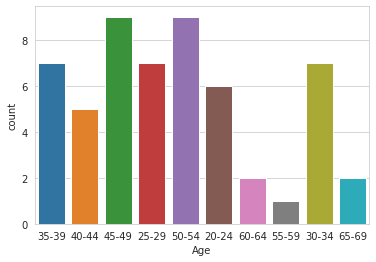

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='age',data=scores)
plt.xlabel('Age')

Text(0.5, 0, 'Sex (1 = female, 2 = male)')

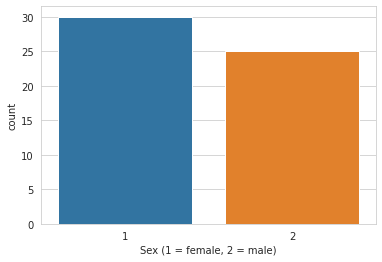

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=scores)
plt.xlabel("Sex (1 = female, 2 = male)")

Text(0.5, 0, 'Days')

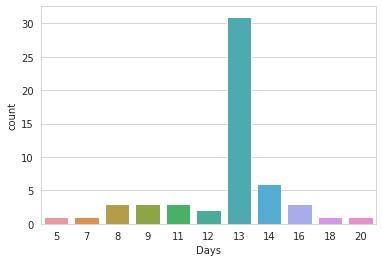

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='days',data=scores)
plt.xlabel("Days")

In [0]:
scores_condition = scores[scores['number'].str.startswith('condition')]
scores.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [0]:
scores_control = scores[scores['number'].str.startswith('control')]
scores_control.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
23,control_1,8,2,25-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,control_2,20,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
25,control_3,12,2,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
26,control_4,13,1,25-29,NaN,NaN,NaN,,NaN,NaN,NaN,NaN
27,control_5,13,1,30-34,NaN,NaN,NaN,,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Sex for condition group(1 = female, 2 = male)')

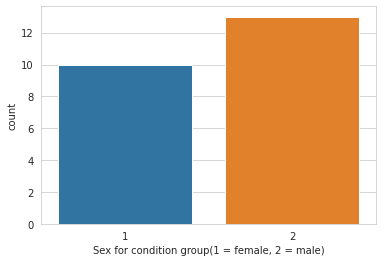

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=scores_condition)
plt.xlabel("Sex for condition group(1 = female, 2 = male)")


Text(0.5, 0, 'Sex for control group(1 = female, 2 = male)')

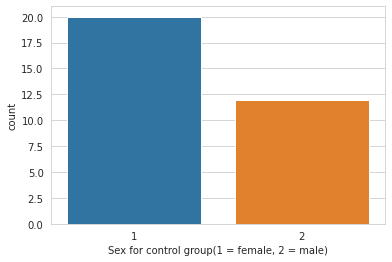

In [0]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=scores_control)
plt.xlabel("Sex for control group(1 = female, 2 = male)")

Text(0.5, 0, 'Sex (1 = female, 2 = male)')

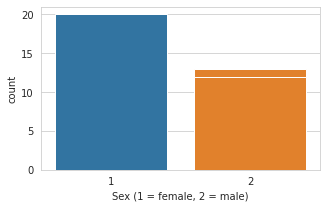

In [0]:
sns.set_style('whitegrid')

plt.figure(figsize=(5,3))

sns.countplot(x='gender',data=scores_condition)

sns.set_style('whitegrid')
sns.countplot(x='gender',data=scores_control)
plt.xlabel("Sex (1 = female, 2 = male)")




Text(0.5, 1.0, 'Mem')

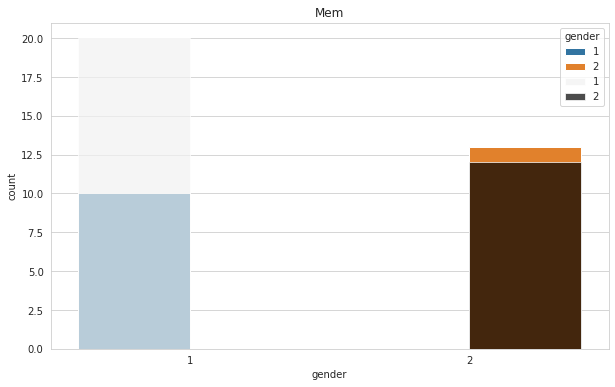

In [0]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.countplot(x='gender', hue='gender',
                
               data=scores_condition, 
               
              )
 
sns.countplot(x='gender', hue='gender',
              
              data=scores_control, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Mem')

In [0]:
condition_path = data_root_path + '/condition/condition_{}.csv' 
control_path = data_root_path + '/control/control_{}.csv'       

condition_row_mike = [
    np.array(pd.read_csv(condition_path.format(x))['activity'])
    for x in range(1, 24) #Общий массив всех пациентов с активностью каждого человека. Т.е. Общий( пациент1[], пациент2[] ... пациент 23[])
]
control_row_mike = [
    np.array(pd.read_csv(control_path.format(x))['activity'])
    for x in range(1, 33) #Общий массив всех здоровых людей с активностью каждого человека. Т.е. Общий( здоровый1[], здоровый2[] ... здоровый 32[])
]




In [0]:
print(condition_row_mike)
print(control_row_mike)

[array([  0, 143,   0, ...,   0,   0, 533]), array([1468, 1006,  468, ...,   13,    0,    0]), array([ 7,  8,  7, ..., 17,  7,  7]), array([510, 637, 598, ...,   0,   0,   0]), array([  0,   0,   0, ..., 390, 197,   0]), array([  0,   0,   0, ...,   0,   0, 666]), array([ 5,  3,  3, ...,  5, 80,  0]), array([  3, 190,   8, ...,   3,   3,   3]), array([  5,   5,   5, ..., 449,   0,   0]), array([ 91,   0,   0, ...,   0, 915,   0]), array([ 0, 53,  0, ...,  0, 15,  5]), array([ 0,  0,  0, ...,  0, 18,  6]), array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 6, 0, 0]), array([  0,   0,   0, ..., 172,   0,   0]), array([0, 3, 0, ..., 0, 0, 3]), array([0, 0, 0, ..., 0, 0, 0]), array([  0,   0,   0, ...,   2,   0, 326]), array([249,  69, 116, ...,   0,   0,   0]), array([ 97, 498, 249, ...,   0,   0, 451]), array([  0, 349, 111, ..., 154,   0,   0]), array([111,  66, 157, ...,   7,   0, 111]), array([161,  80, 175, ...,  48,   0,   0])]
[array([ 60,   0, 264, ...,   3,   3,   0]), array([1

In [0]:
#Подсчет среднего значения двигательной активности
sum_cond = 0.0
sum_control = 0.0

for element in condition_row_mike:
    sum_cond += np.mean(element)
    
for element in control_row_mike:
    sum_control += np.mean(element)

mean_cond = sum_cond / len(condition_row_mike)       
mean_control_group = sum_control / len(control_row_mike)   


print("Средняя активность у пациентов с депрессией: ", mean_cond)
print("Средняя активность у здоровых людей: ", mean_control_group)


Средняя активность у пациентов с депрессией:  163.71934938375816
Средняя активность у здоровых людей:  208.65312289017834


In [0]:
#print(condition_raw[0]) #нужно выводить зависимости от времени, лучше двумерный массив

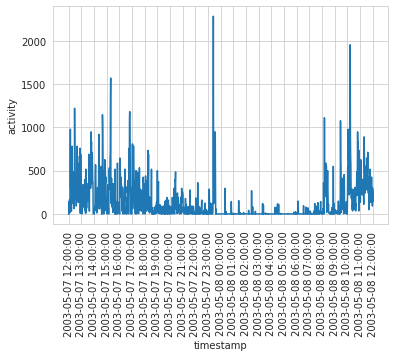

In [0]:
condition1_activity = pd.read_csv(data_root_path + '/condition/condition_1.csv', nrows = 1442)
g = sns.lineplot(data=condition1_activity, x = 'timestamp', y = 'activity')
plt.xticks(rotation=90)
g.set_xticks(g.get_xticks()[::60])

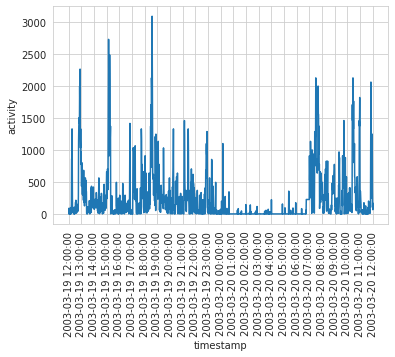

In [0]:
control1_activity = pd.read_csv(data_root_path + '/control/control_1.csv', skiprows=[i for i in range(1,1261)], nrows = 1442)
g = sns.lineplot(data=control1_activity, x = 'timestamp', y = 'activity')
plt.xticks(rotation=90)
g.set_xticks(g.get_xticks()[::60])

In [0]:
#как парсить время

str = '2003-03-19 11:47:00'
mytime = datetime.strptime(str, "%Y-%m-%d %H:%M:%S").time()
print(mytime.hour)

#curr_hour = datetime.strptime(curr_str[0], "%Y-%m-%d %H:%M:%S").time().hour

11


In [0]:
day_start = 4 
day_end =  16
night_start = 17
night_end =  3

In [0]:
condition_path = data_root_path + '/condition/condition_{}.csv' 
control_path = data_root_path + '/control/control_{}.csv'    

condition_row = [
    np.array(pd.read_csv(condition_path.format(x)))
    for x in range(1, 24) #Общий массив всех пациентов с активностью каждого человека.
]


control_row = [
    np.array(pd.read_csv(control_path.format(x)))
    for x in range(1, 33) #Общий массив всех здоровых людей с активностью каждого человека. 
]


#Подсчет среднего значения двигательной активности для ночного и дневного времени для больных
sum_night_cond = 0.0
sum_day_cond = 0.0

for i in range(len(condition_row)): #проходимся по всем файлам
    curr_file = condition_row[i]
    curr_file_sum_cond = 0
    curr_sum_cond = 0
    curr_count_cond = 0

    curr_file_sum_cond_day = 0
    curr_sum_cond_day = 0
    curr_count_cond_day = 0

    for j in range(len(curr_file)): #количество строк в файле
      curr_str = curr_file[j]
      curr_hour = datetime.strptime(curr_str[0], "%Y-%m-%d %H:%M:%S").time().hour
      if (curr_hour >= night_start or curr_hour <= night_end):
        curr_sum_cond += curr_str[2] 
        curr_count_cond += 1

      if (day_start <= curr_hour <= day_end):
        curr_sum_cond_day += curr_str[2] 
        curr_count_cond_day += 1

    curr_file_sum_cond = curr_sum_cond / curr_count_cond
    sum_night_cond += curr_file_sum_cond

    curr_file_sum_cond_day = curr_sum_cond_day / curr_count_cond_day
    sum_day_cond += curr_file_sum_cond_day

#Подсчет среднего значения двигательной активности для ночного времени для здоровых
sum_night_control = 0.0
sum_day_control = 0.0

for i in range(len(control_row)): #проходимся по всем файлам
    curr_file = control_row[i]
    curr_file_sum_cont = 0
    curr_sum_cont = 0
    curr_count_cont = 0

    curr_file_sum_cont_day = 0
    curr_sum_cont_day = 0
    curr_count_cont_day = 0

    for j in range(len(curr_file)): #количество строк в файле
      curr_str = curr_file[j]
      curr_hour = datetime.strptime(curr_str[0], "%Y-%m-%d %H:%M:%S").time().hour
      if (curr_hour >= night_start or curr_hour <= night_end):
        curr_sum_cont += curr_str[2] 
        curr_count_cont += 1
      
      if (day_start <= curr_hour <= day_end):
        curr_sum_cont_day += curr_str[2] 
        curr_count_cont_day += 1

    curr_file_sum_cont = curr_sum_cont / curr_count_cont
    sum_night_control += curr_file_sum_cont

    curr_file_sum_cont_day = curr_sum_cont_day / curr_count_cont_day
    sum_day_control += curr_file_sum_cont_day

mean_control = sum_night_control / len(control_row)   
mean_cond = sum_night_cond / len(condition_row)

mean_control_day = sum_day_control / len(control_row)   
mean_cond_day = sum_day_cond / len(condition_row)

print("Средняя активность у пациентов с депрессией в ночное время: ", mean_cond)
print("Средняя активность у здоровых людей в ночное время: ", mean_control)

print("Средняя активность у пациентов с депрессией в дневное время: ", mean_cond_day)
print("Средняя активность у здоровых людей в дневное время: ", mean_control_day)


Средняя активность у пациентов с депрессией в ночное время:  146.88090105897174
Средняя активность у здоровых людей в ночное время:  178.76436028836736
Средняя активность у пациентов с депрессией в дневное время:  177.96555365180126
Средняя активность у здоровых людей в дневное время:  233.69018589935487


In [0]:
disp = 0.0
sum_otklonenie = 0.0

for element in condition_row:
    print(element)
    print(mean_cond)
    #otklonenie = (np.mean(element) - mean_cond)
    #sum_otklonenie += otklonenie

#disp = sum_otklonenie/len(condition_row) 
#print(disp)

[['2003-05-07 12:00:00' '2003-05-07' 0]
 ['2003-05-07 12:01:00' '2003-05-07' 143]
 ['2003-05-07 12:02:00' '2003-05-07' 0]
 ...
 ['2003-05-23 15:21:00' '2003-05-23' 0]
 ['2003-05-23 15:22:00' '2003-05-23' 0]
 ['2003-05-23 15:23:00' '2003-05-23' 533]]
146.88090105897174
[['2003-05-07 15:00:00' '2003-05-07' 1468]
 ['2003-05-07 15:01:00' '2003-05-07' 1006]
 ['2003-05-07 15:02:00' '2003-05-07' 468]
 ...
 ['2003-06-03 15:43:00' '2003-06-03' 13]
 ['2003-06-03 15:44:00' '2003-06-03' 0]
 ['2003-06-03 15:45:00' '2003-06-03' 0]]
146.88090105897174
[['2003-05-19 15:00:00' '2003-05-19' 7]
 ['2003-05-19 15:01:00' '2003-05-19' 8]
 ['2003-05-19 15:02:00' '2003-05-19' 7]
 ...
 ['2003-06-03 15:45:00' '2003-06-03' 17]
 ['2003-06-03 15:46:00' '2003-06-03' 7]
 ['2003-06-03 15:47:00' '2003-06-03' 7]]
146.88090105897174
[['2003-06-03 11:59:00' '2003-06-03' 510]
 ['2003-06-03 12:00:00' '2003-06-03' 637]
 ['2003-06-03 12:01:00' '2003-06-03' 598]
 ...
 ['2003-06-18 11:12:00' '2003-06-18' 0]
 ['2003-06-18 11:13:

([<matplotlib.axis.XTick at 0x7f6d7c6101d0>,
 <a list of 24 Text major ticklabel objects>)

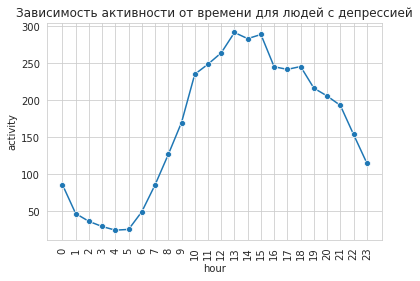

In [0]:
#создаем новые csv-файлы, где будут хранится средние значения активности за каждый час

data_root_path = 'drive/My Drive/3 курс/data' 

#для людей с депрессией
with open('mean_condition.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['hour', 'activity'])
        
    condition_path = data_root_path + '/condition/condition_{}.csv'   

    condition_row = [
        np.array(pd.read_csv(condition_path.format(x)))
        for x in range(1, 24) #Общий массив всех пациентов с активностью каждого человека.
    ]

    mean_hour = np.zeros(24)
    mean_hour_count = np.zeros(24)

    for i in range(len(condition_row)): #проходимся по всем файлам
        curr_file = condition_row[i]
        
        for j in range(len(curr_file)): #количество строк в файле
          curr_str = curr_file[j]
          curr_hour = datetime.strptime(curr_str[0], "%Y-%m-%d %H:%M:%S").time().hour
          
          mean_hour[curr_hour] += curr_str[2]
          mean_hour_count[curr_hour] += 1

    mean_hour = mean_hour/mean_hour_count
    
    #добавляем данные о средних значениях в csv-файл
    for i in range(len(mean_hour)):
      filewriter.writerow([i, mean_hour[i]])

#выводим график
mean_condition = pd.read_csv('mean_condition.csv')
g1 = sns.lineplot(data=mean_condition, x = 'hour', y = 'activity', marker="o")
g1.set_title('Зависимость активности от времени для людей с депрессией')
plt.xticks(rotation=90)
plt.xticks(range(24))



([<matplotlib.axis.XTick at 0x7f6d7edd5b38>,
 <a list of 24 Text major ticklabel objects>)

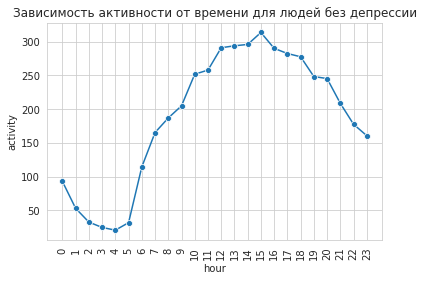

In [0]:
#для здоровых людей
with open('mean_control.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    filewriter.writerow(['hour', 'activity'])
        
    control_path = data_root_path + '/control/control_{}.csv'    

    control_row = [
    np.array(pd.read_csv(control_path.format(x)))
    for x in range(1, 33) #Общий массив всех здоровых людей с активностью каждого человека. 
    ]

    mean_hour = np.zeros(24)
    mean_hour_count = np.zeros(24)

    for i in range(len(control_row)): #проходимся по всем файлам
        curr_file = control_row[i]
        
        for j in range(len(curr_file)): #количество строк в файле
          curr_str = curr_file[j]
          curr_hour = datetime.strptime(curr_str[0], "%Y-%m-%d %H:%M:%S").time().hour
          
          mean_hour[curr_hour] += curr_str[2]
          mean_hour_count[curr_hour] += 1

    mean_hour = mean_hour/mean_hour_count

    #добавляем данные о средних значениях в csv-файл
    for i in range(len(mean_hour)):
      filewriter.writerow([i, mean_hour[i]])

#выводим график
mean_control = pd.read_csv('mean_control.csv')
g2 = sns.lineplot(data=mean_control, x = 'hour', y = 'activity', marker="o")
g2.set_title('Зависимость активности от времени для людей без депрессии')
plt.xticks(rotation=90)
plt.xticks(range(24))

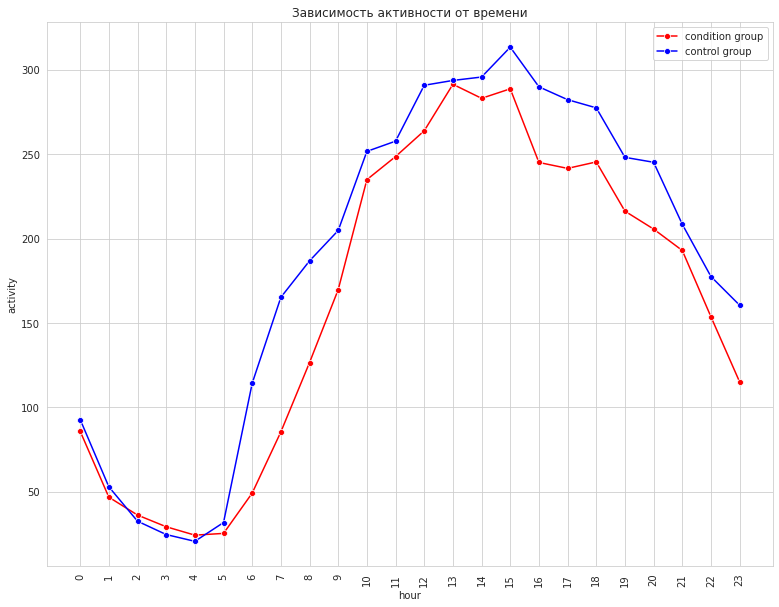

In [0]:
fig, ax = plt.subplots(figsize=(13,10))

g = sns.lineplot(data=mean_condition, x = 'hour', y = 'activity', marker="o", color = 'r', ax=ax)
sns.lineplot(data=mean_control, x = 'hour', y = 'activity', marker="o", color = 'b', ax=ax)

plt.xticks(rotation=90)
plt.xticks(range(24))
g.set_title('Зависимость активности от времени')
 
ax.legend(['condition group', 'control group'], facecolor='w')
plt.show()

In [0]:
#дисперсия для здоровых людей
total_ctrl = 0

for i in range(len(control_row)): #проходимся по всем файлам
      curr_file = control_row[i]
      person_sum = 0
      curr_mean = 0
      new_arr = np.zeros(len(curr_file)) #массив показателей активности
      for j in range(len(curr_file)): #количество строк в файле
        curr_str = curr_file[j]    
        new_arr[j] = curr_str[2]
      person_disp = np.var(new_arr) #считаем дисперсию для числового ряда
      total_ctrl += person_disp
total_ctrl /= len(control_row)

print('Средняя дисперсия для здоровых людей:',total_ctrl)

#дисперсия для людей с депрессией

total_cnd = 0

for i in range(len(condition_row)): #проходимся по всем файлам
      curr_file = condition_row[i]
      person_sum = 0
      curr_mean = 0
      new_arr = np.zeros(len(curr_file)) #массив показателей активности
      for j in range(len(curr_file)): #количество строк в файле
        curr_str = curr_file[j]    
        new_arr[j] = curr_str[2]
      person_disp = np.var(new_arr) #считаем дисперсию для числового ряда
      total_cnd += person_disp
total_cnd /= len(condition_row)

print('Средняя дисперсия для людей с депрессией:',total_cnd)

Средняя дисперсия для здоровых людей: 145532.9967695738
Средняя дисперсия для людей с депрессией: 98234.38130241663


 +-3sigma у больных и здоровых 


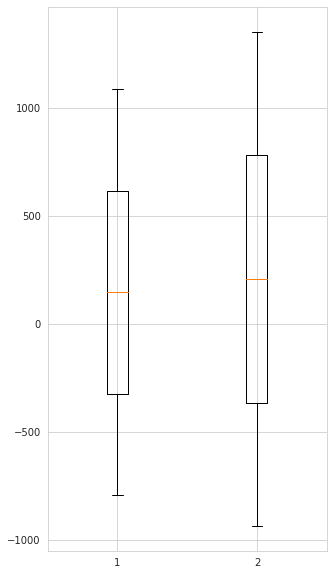

In [0]:
sigma_ctrl = math.sqrt(total_ctrl)
sigma_cnd = math.sqrt(total_cnd)

sigma3_ctrl = math.sqrt(total_ctrl) * 3
sigma3_cnd = math.sqrt(total_cnd) * 3

lower_cond = mean_cond - sigma3_cnd #Доверительный интвервал для condition (верхняя и нижняя границы)   
upper_cond = mean_cond + sigma3_cnd

lower_ctrl = mean_control_group - sigma3_ctrl #Доверительный интвервал для control (верхняя и нижняя границы)
upper_ctrl = mean_control_group + sigma3_ctrl

data1 = [lower_cond , upper_cond]
data2 = [lower_ctrl, upper_ctrl]
data = [data1, data2]
fig, ax = plt.subplots(figsize=(5,10))
box_dict = ax.boxplot(data)

print(" +-3sigma у больных и здоровых ")

In [0]:
pip freeze > requirements.txt